In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import joblib

In [715]:
laptops = pd.read_csv("G:/Study material/Data Science/Projects/1. Laptop price predictor/laptop_data_campusx.csv")

laptops.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [716]:
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 822.2 KB


In [717]:
laptops.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [718]:
laptops.drop("Unnamed: 0", axis=1, inplace=True)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Preprocessing

In [719]:
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 812.0 KB


In [720]:
laptops["Ram"].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [721]:
laptops["Ram"] = laptops["Ram"].str.replace("GB","")
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [722]:
laptops["Weight"] = laptops["Weight"].str.replace("kg","")
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [723]:
laptops["Ram"] = laptops["Ram"].astype("int32")
laptops["Weight"] = laptops["Weight"].astype("float32")

laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Feature Enginnering

In [724]:
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


## Company

In [725]:
laptops["Company"].value_counts(dropna=False)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [726]:
list1 = ['Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei']

laptops["Company"] = np.where(laptops["Company"].isin(list1), "Other", laptops["Company"])

laptops["Company"].value_counts(dropna=False)

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

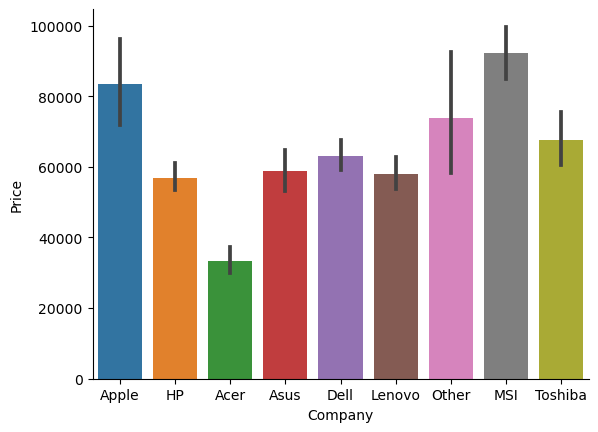

In [727]:
sns.barplot(x="Company", y="Price", data=laptops)

sns.despine()

## TypeName

In [728]:
laptops["TypeName"].value_counts(dropna=False)

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

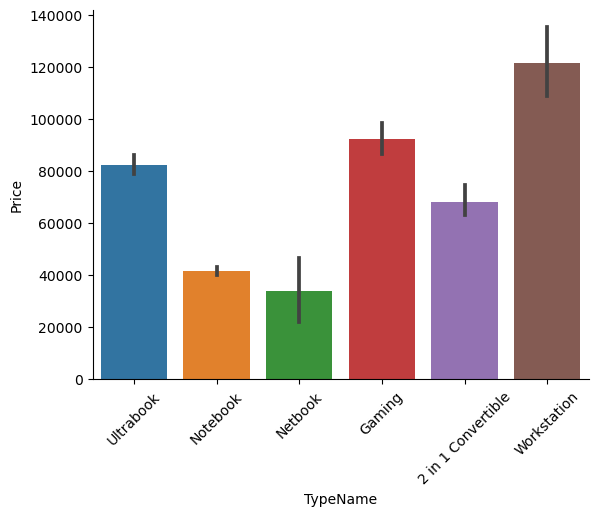

In [729]:
sns.barplot(x="TypeName", y="Price", data=laptops)
plt.xticks(rotation=45)

sns.despine()

## Inches

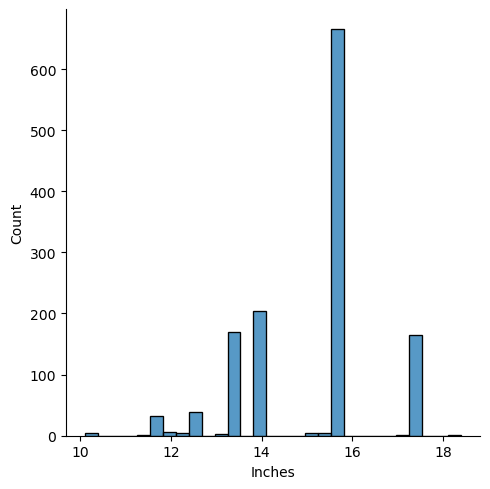

In [730]:
sns.displot(laptops["Inches"])

plt.show()

In [731]:
laptops["Inches"].value_counts().sort_index()

10.1      4
11.3      1
11.6     33
12.0      6
12.3      5
12.5     39
13.0      2
13.3    164
13.5      6
13.9      6
14.0    197
14.1      1
15.0      4
15.4      4
15.6    665
17.0      1
17.3    164
18.4      1
Name: Inches, dtype: int64

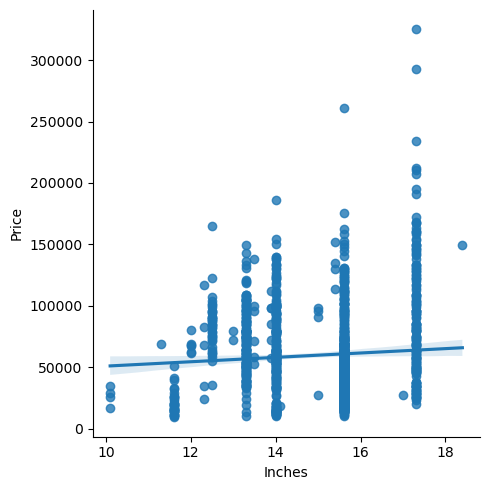

In [732]:
sns.lmplot(x="Inches", y="Price", data=laptops)

sns.despine()

## ScreenResolution

In [733]:
laptops["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [734]:
laptops["ScreenResolution"].str[-9:]

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [735]:
laptops["IPS"] = laptops["ScreenResolution"].apply(lambda x:"Yes" if "IPS" in x else "No")
laptops["Touchscreen"] = laptops["ScreenResolution"].apply(lambda x:"Yes" if "Touchscreen" in x else "No")

In [736]:
laptops["ScreenResolution"] = laptops["ScreenResolution"].str[-9:]

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen
0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No
3,Apple,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No
4,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No


In [737]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  IPS               1303 non-null   object 
 12  Touchscreen       1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), object(9)
memory usage: 122.3+ KB


In [738]:
laptops["ScreenResolution"].value_counts(dropna=False)

1920x1080    841
1366x768     281
3840x2160     43
3200x1800     27
 1366x768     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: ScreenResolution, dtype: int64

In [739]:
laptops["ScreenResolution"].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', ' 1366x768',
       '3840x2160', '2160x1440', '2560x1440', '1600x900', '2736x1824',
       '2400x1600'], dtype=object)

In [740]:
ScreenResolution_list = ["1920x1080","1366x768","3840x2160","3200x1800","1366x768","2560x1440","1600x900"]

In [741]:
def screenresolution_fun(var):
    if "1920x1080" in var:
        return "1920x1080"
    elif "1366x768" in var:
        return "1366x768"
    elif "3840x2160" in var:
        return "3840x2160"
    elif "3200x1800" in var:
        return "3200x1800"
    elif "1366x768" in var:
        return "1366x768"
    elif "2560x1440" in var:
        return "2560x1440"
    elif "1600x900" in var:
        return "1600x900"
    else:
        return "other"

In [742]:
laptops["ScreenResolution"].apply(screenresolution_fun)

0           other
1           other
2       1920x1080
3           other
4           other
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [743]:
laptops["ScreenResolution"] = laptops["ScreenResolution"].apply(screenresolution_fun)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen
0,Apple,Ultrabook,13.3,other,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No
1,Apple,Ultrabook,13.3,other,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No
3,Apple,Ultrabook,15.4,other,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No
4,Apple,Ultrabook,13.3,other,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No


In [744]:
laptops["ScreenResolution"].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
other         38
3200x1800     27
2560x1440     23
1600x900      23
Name: ScreenResolution, dtype: int64

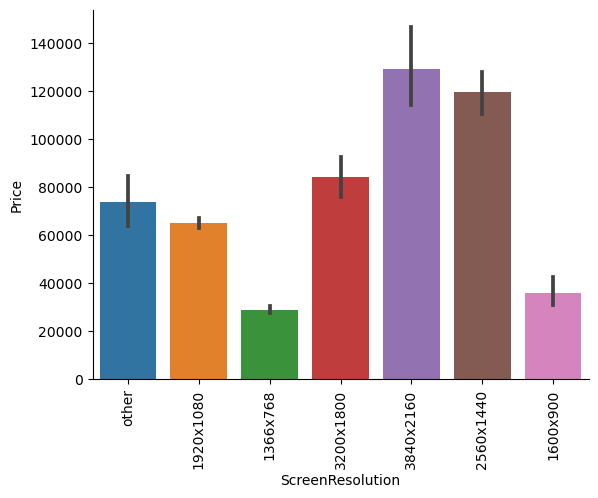

In [745]:
sns.barplot(x="ScreenResolution", y="Price", data=laptops)
plt.xticks(rotation="vertical")
sns.despine()

In [746]:
laptops["IPS"].value_counts()

No     938
Yes    365
Name: IPS, dtype: int64

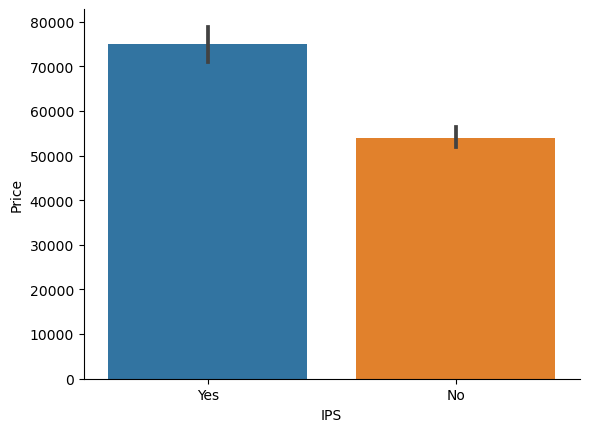

In [747]:
sns.barplot(x="IPS", y="Price", data=laptops)

sns.despine()

In [748]:
laptops["Touchscreen"].value_counts()

No     1111
Yes     192
Name: Touchscreen, dtype: int64

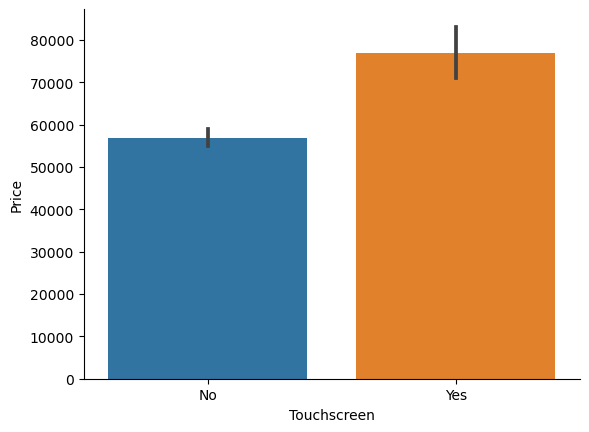

In [749]:
sns.barplot(x="Touchscreen", y="Price", data=laptops)

sns.despine()

## Cpu

In [750]:
pd.set_option('display.max_rows', None)
laptops["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core i5 6300U 2.4GHz                11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel Core

In [751]:
pd.reset_option('display.max_rows')

laptops["Cpu"].str.split()

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [752]:
laptops["CPU_name"]=laptops["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_name
0,Apple,Ultrabook,13.3,other,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5
1,Apple,Ultrabook,13.3,other,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5
3,Apple,Ultrabook,15.4,other,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7
4,Apple,Ultrabook,13.3,other,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5


In [753]:
laptops["CPU_name"].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [754]:
def fun_cpu(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    elif text.split()[0]=="Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [755]:
laptops["CPU_Brand"] = laptops["CPU_name"].apply(fun_cpu)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_name,CPU_Brand
0,Apple,Ultrabook,13.3,other,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,other,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,other,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,other,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5,Intel Core i5


In [756]:
laptops["CPU_Brand"].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU_Brand, dtype: int64

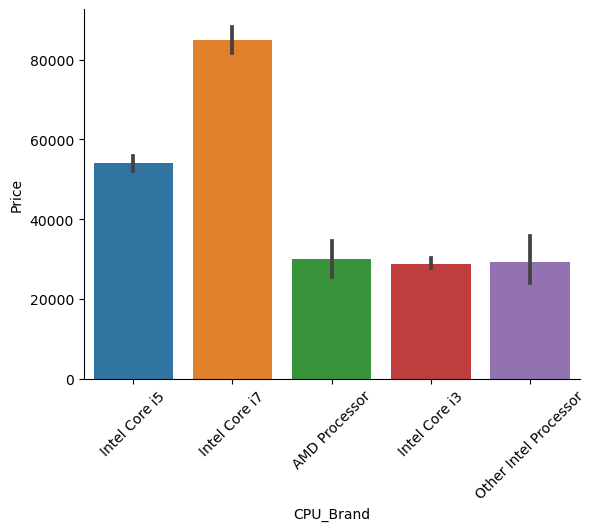

In [757]:
sns.barplot(x="CPU_Brand", y="Price", data=laptops)
plt.xticks(rotation=45)

sns.despine()

In [758]:
#laptops["CPU_freq(GHz)"]=laptops['Cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
#laptops["CPU_freq(GHz)"] = laptops["CPU_freq(GHz)"].str.replace("GHz", "")
#laptops["CPU_freq(GHz)"] = laptops["CPU_freq(GHz)"].astype("float32")

#laptops.head()

In [759]:
#sns.histplot(laptops["CPU_freq(GHz)"]);

In [760]:
#sns.scatterplot(x="CPU_freq(GHz)", y="Price", data=laptops)
#sns.despine()

In [761]:
laptops.drop(["Cpu", "CPU_name"], axis=1, inplace=True)

## RAM

In [762]:
laptops["Ram"].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [763]:
laptops["Ram"].dtype

dtype('int32')

In [764]:
pd.Series(np.where(laptops["Ram"] <=16, laptops["Ram"], "24+")).value_counts()

8      619
4      375
16     200
6       41
12      25
2       22
24+     21
dtype: int64

In [765]:
laptops["Ram"] = np.where(laptops["Ram"] <=16, laptops["Ram"], "24+")

In [766]:
laptops["Ram"].value_counts()

8      619
4      375
16     200
6       41
12      25
2       22
24+     21
Name: Ram, dtype: int64

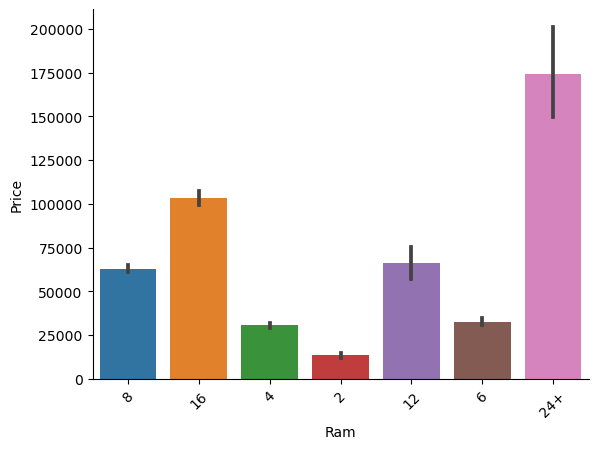

In [767]:
sns.barplot(x="Ram", y="Price", data=laptops)
plt.xticks(rotation=45)

sns.despine()

## Memory

In [768]:
laptops["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [769]:
laptops['Memory'] = laptops['Memory'].astype(str).replace('\.0', '', regex=True)

In [770]:
temp = laptops["Memory"].str.split("+", expand=True)

temp.head()

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
3,512GB SSD,None
4,256GB SSD,None


In [771]:
temp[0] = temp[0].str.replace("GB",'')
temp[0] = temp[0].str.replace("TB",'000')
temp[1] = temp[1].str.replace("GB",'')
temp[1] = temp[1].str.replace("TB",'000')

temp

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [772]:
temp[1].fillna("0", inplace=True)

temp["SSD_1"] = temp[0].apply(lambda x:1 if "SSD" in x else 0)
temp["SSD_2"] = temp[1].apply(lambda x:1 if "SSD" in x else 0)
temp["HDD_1"] = temp[0].apply(lambda x:1 if "HDD" in x else 0)
temp["HDD_2"] = temp[1].apply(lambda x:1 if "HDD" in x else 0)
temp["Flash Storage_1"] = temp[0].apply(lambda x:1 if "Flash Storage" in x else 0)
temp["Flash Storage_2"] = temp[1].apply(lambda x:1 if "Flash Storage" in x else 0)
temp["Hybrid_1"] = temp[0].apply(lambda x:1 if "Hybrid" in x else 0)
temp["Hybrid_2"] = temp[1].apply(lambda x:1 if "Hybrid" in x else 0)

temp.head()

,0,1,SSD_1,SSD_2,HDD_1,HDD_2,Flash Storage_1,Flash Storage_2,Hybrid_1,Hybrid_2
0,128 SSD,0,1,0,0,0,0,0,0,0
1,128 Flash Storage,0,0,0,0,0,1,0,0,0
2,256 SSD,0,1,0,0,0,0,0,0,0
3,512 SSD,0,1,0,0,0,0,0,0,0
4,256 SSD,0,1,0,0,0,0,0,0,0


In [773]:
temp[0] = temp[0].str.replace(r'\D', '')
temp[1] = temp[1].str.replace(r'\D', '')

temp.head()

C:\Users\yogesh\AppData\Local\Temp\ipykernel_9880\671628985.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp[0] = temp[0].str.replace(r'\D', '')
C:\Users\yogesh\AppData\Local\Temp\ipykernel_9880\671628985.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  temp[1] = temp[1].str.replace(r'\D', '')


,0,1,SSD_1,SSD_2,HDD_1,HDD_2,Flash Storage_1,Flash Storage_2,Hybrid_1,Hybrid_2
0,128,0,1,0,0,0,0,0,0,0
1,128,0,0,0,0,0,1,0,0,0
2,256,0,1,0,0,0,0,0,0,0
3,512,0,1,0,0,0,0,0,0,0
4,256,0,1,0,0,0,0,0,0,0


In [774]:
temp[0] = temp[0].astype("int32")
temp[1] = temp[1].astype("int32")

In [775]:
temp["SSD"] = (temp["SSD_1"] * temp[0]) + (temp["SSD_2"] * temp[1])
temp["HDD"] = (temp["HDD_1"] * temp[0]) + (temp["HDD_2"] * temp[1])
temp["Flash_Storage"] = (temp["Flash Storage_1"] * temp[0]) + (temp["Flash Storage_2"] * temp[1])
temp["Hybrid"] = (temp["Hybrid_1"] * temp[0]) + (temp["Hybrid_2"] * temp[1])

temp.head()

,0,1,SSD_1,SSD_2,HDD_1,HDD_2,Flash Storage_1,Flash Storage_2,Hybrid_1,Hybrid_2,SSD,HDD,Flash_Storage,Hybrid
0,128,0,1,0,0,0,0,0,0,0,128,0,0,0
1,128,0,0,0,0,0,1,0,0,0,0,0,128,0
2,256,0,1,0,0,0,0,0,0,0,256,0,0,0
3,512,0,1,0,0,0,0,0,0,0,512,0,0,0
4,256,0,1,0,0,0,0,0,0,0,256,0,0,0


In [776]:
temp = temp.loc[:,["SSD", "HDD", "Flash_Storage", "Hybrid"]]



In [777]:
laptops = laptops.merge(temp,
                       right_index = True,
                       left_index = True,
                       how = "inner")

laptops.drop("Memory", axis=1, inplace=True)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,13.3,other,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,0,0,128,0
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,15.4,other,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5,256,0,0,0


In [778]:
laptops["SSD"].value_counts()

256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

In [779]:
def ssd_fun(var):
    if var == 0:
        return "No SSD"
    elif var > 1 and var <= 128:
        return "128GB and less"
    elif var == 256 or var == 180 or var == 240:
        return "256GB"
    elif var == 512 or var == 768:
        return "512GB"
    else:
        return "1TB"    

In [780]:
pd.Series(laptops["SSD"].apply(ssd_fun)).value_counts()

256GB             504
No SSD            460
128GB and less    183
512GB             139
1TB                17
Name: SSD, dtype: int64

In [781]:
laptops["SSD"] = laptops["SSD"].apply(ssd_fun)

In [782]:
laptops["SSD"].value_counts()

256GB             504
No SSD            460
128GB and less    183
512GB             139
1TB                17
Name: SSD, dtype: int64

In [783]:
laptops["HDD"].value_counts()

0       727
1000    408
500     134
2000     32
32        1
128       1
Name: HDD, dtype: int64

In [784]:
hdd_list = [32, 128]

laptops.drop(laptops.loc[laptops["HDD"].isin(hdd_list)].index, axis=0, inplace=True)

In [785]:
laptops["HDD"].value_counts()

0       727
1000    408
500     134
2000     32
Name: HDD, dtype: int64

In [786]:
def hdd_fun(var):
    if var == 0:
        return "No HDD"
    elif var == 500:
        return "512GB"
    elif var == 1000:
        return "1TB"
    else:
        return "2TB"

In [787]:
laptops["HDD"].apply(hdd_fun).value_counts()

No HDD    727
1TB       408
512GB     134
2TB        32
Name: HDD, dtype: int64

In [788]:
laptops["HDD"] = laptops["HDD"].apply(hdd_fun)

In [789]:
laptops["HDD"].value_counts()

No HDD    727
1TB       408
512GB     134
2TB        32
Name: HDD, dtype: int64

In [790]:
laptops["Flash_Storage"].value_counts()

0      1226
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

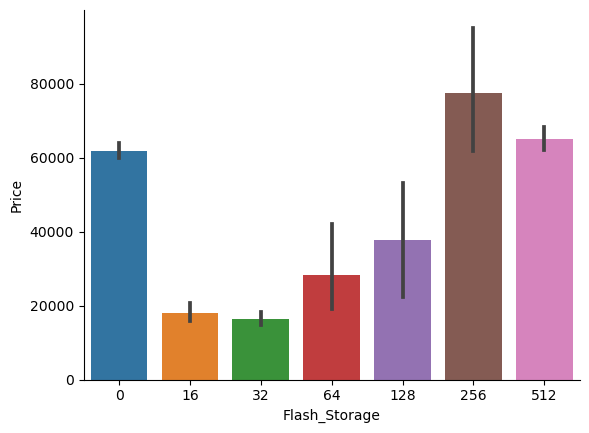

In [791]:
sns.barplot(x="Flash_Storage", y="Price", data=laptops)

sns.despine()

In [792]:
laptops["Flash_Storage"].value_counts()

0      1226
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

In [793]:
def flash_storage_fun(var):
    if var == 0:
        return "No"
    else:
        return "Yes"

In [794]:
laptops["Flash_Storage"].apply(flash_storage_fun).value_counts()

No     1226
Yes      75
Name: Flash_Storage, dtype: int64

In [795]:
laptops["Flash_Storage"] = laptops["Flash_Storage"].apply(flash_storage_fun)

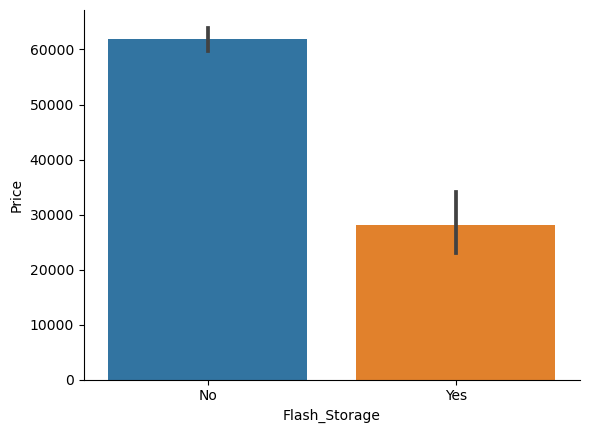

In [796]:
sns.barplot(x="Flash_Storage", y="Price", data=laptops)

sns.despine()

In [797]:
laptops["Hybrid"].value_counts()

0       1289
1000      11
508        1
Name: Hybrid, dtype: int64

In [798]:
## We will drop this column because we have very less data of laptops which has hybrid storage

laptops.drop("Hybrid",axis=1, inplace=True)

In [799]:
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No
1,Apple,Ultrabook,13.3,other,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No
3,Apple,Ultrabook,15.4,other,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No
4,Apple,Ultrabook,13.3,other,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No


## Gpu

In [800]:
laptops["Gpu"].value_counts(dropna=False)

Intel HD Graphics 620      280
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [801]:
def GPU(text):
    if ("Intel").lower() in text.lower():
        return "Intel"
    elif ("AMD").lower() in text.lower():
        return "AMD"
    elif ("Nvidia").lower() in text.lower():
        return "Nvidia"
    else:
        return "Other"

In [802]:
laptops["GPU_brand"] = laptops["Gpu"].apply(GPU)

laptops["GPU_brand"].value_counts(dropna=True)

Intel     720
Nvidia    400
AMD       180
Other       1
Name: GPU_brand, dtype: int64

In [803]:
laptops = laptops[laptops["GPU_brand"]!="Other"]

laptops["GPU_brand"].value_counts(dropna=True)

Intel     720
Nvidia    400
AMD       180
Name: GPU_brand, dtype: int64

In [804]:
laptops.drop("Gpu", axis=1, inplace=True)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,GPU_brand
0,Apple,Ultrabook,13.3,other,8,macOS,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,13.3,other,8,macOS,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,15.6,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,15.4,other,16,macOS,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,13.3,other,8,macOS,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


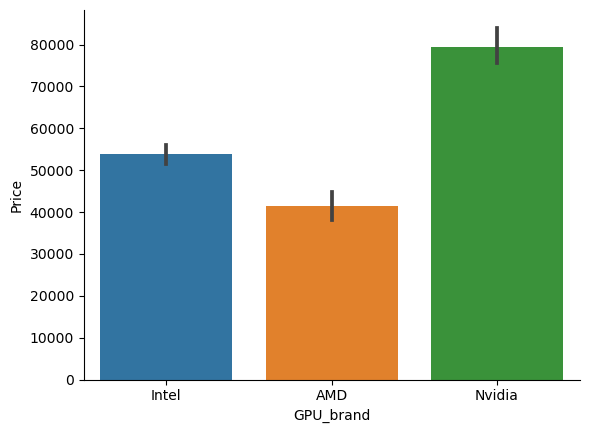

In [805]:
sns.barplot(x="GPU_brand", y="Price", data=laptops)

sns.despine()

## OpSys

In [806]:
laptops["OpSys"].value_counts()

Windows 10      1070
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [807]:
def os_fetch(text):
    if text=="Windows 10" or text=="Windows 7" or text=="Windows 10 S":
        return "Windows"
    elif text=="macOS" or text=="Mac OS X":
        return "Mac"
    elif text=="Linux":
        return "Linux"
    elif text=="No OS":
        return "No OS"
    else:
        return "Other"

In [808]:
laptops["OpSys"] = laptops["OpSys"].apply(os_fetch)

laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,GPU_brand
0,Apple,Ultrabook,13.3,other,8,Mac,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,13.3,other,8,Mac,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,15.6,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,15.4,other,16,Mac,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,13.3,other,8,Mac,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


In [809]:
laptops["OpSys"].value_counts()

Windows    1123
No OS        66
Linux        62
Other        28
Mac          21
Name: OpSys, dtype: int64

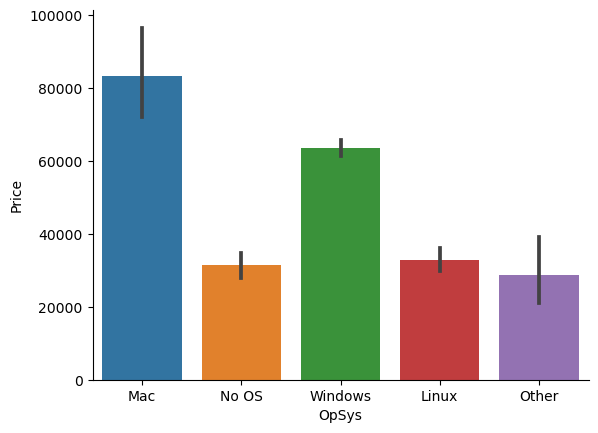

In [810]:
sns.barplot(x="OpSys", y="Price", data=laptops)

sns.despine()

In [811]:
laptops.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,GPU_brand
0,Apple,Ultrabook,13.3,other,8,Mac,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,13.3,other,8,Mac,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,15.6,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,15.4,other,16,Mac,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,13.3,other,8,Mac,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


## Weight

<Axes: ylabel='Frequency'>

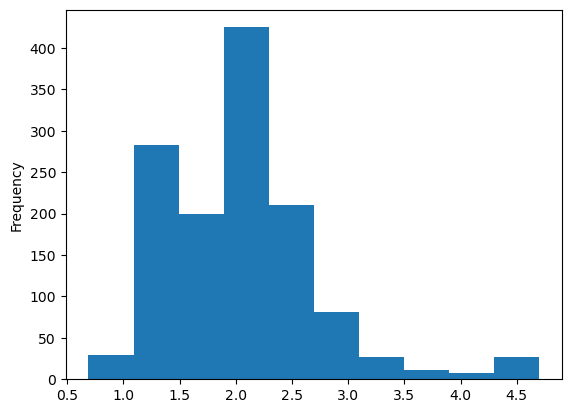

In [812]:
laptops["Weight"].plot.hist()

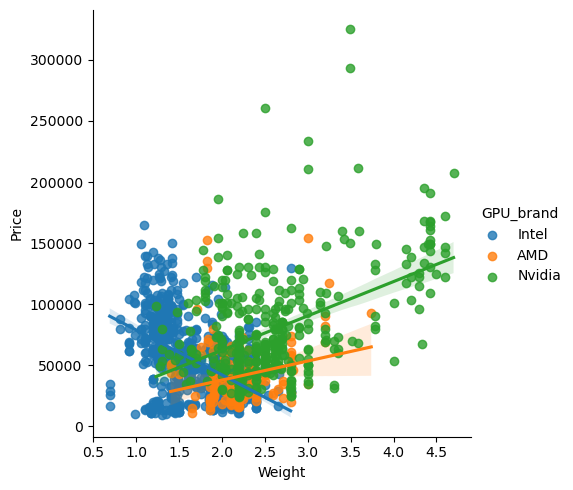

In [813]:
sns.lmplot(x="Weight", y="Price", data=laptops, hue="GPU_brand")

sns.despine()

## Price

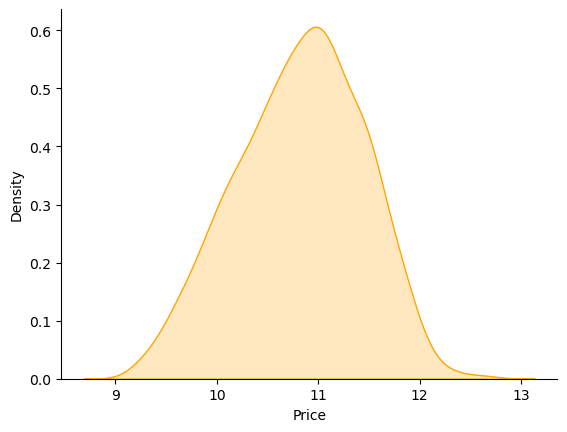

In [814]:
sns.kdeplot(np.log(laptops["Price"]), fill=True, color="orange")

sns.despine()

<Axes: >

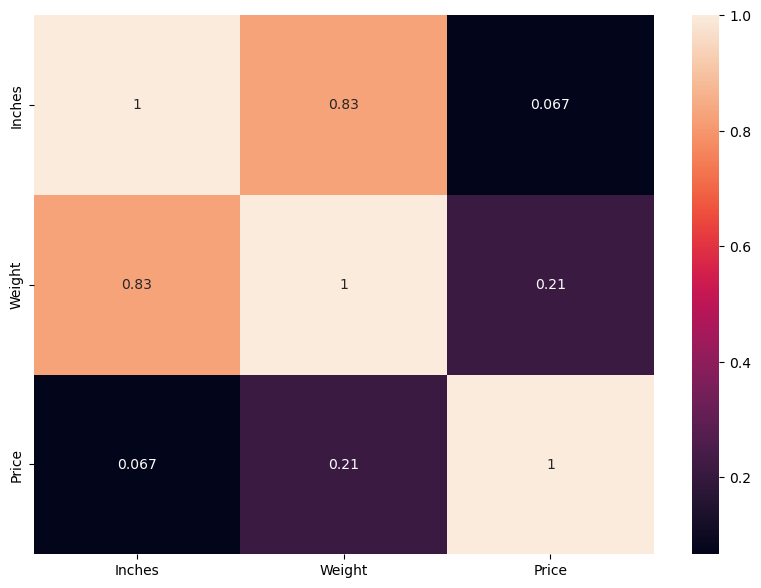

In [815]:
plt.figure(figsize=(10,7))

sns.heatmap(laptops.corr(numeric_only=True),
           annot=True)

In [816]:
## We can drop Incehs column because it is not correlated with price

laptops.drop("Inches", axis=1, inplace=True)

In [817]:
laptops.head()

,Company,TypeName,ScreenResolution,Ram,OpSys,Weight,Price,IPS,Touchscreen,CPU_Brand,SSD,HDD,Flash_Storage,GPU_brand
0,Apple,Ultrabook,other,8,Mac,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,other,8,Mac,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,other,16,Mac,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,other,8,Mac,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


In [818]:
laptops.columns = list(map(str.lower, laptops.columns))

laptops.head()

,company,typename,screenresolution,ram,opsys,weight,price,ips,touchscreen,cpu_brand,ssd,hdd,flash_storage,gpu_brand
0,Apple,Ultrabook,other,8,Mac,1.37,71378.6832,Yes,No,Intel Core i5,128GB and less,No HDD,No,Intel
1,Apple,Ultrabook,other,8,Mac,1.34,47895.5232,No,No,Intel Core i5,No SSD,No HDD,Yes,Intel
2,HP,Notebook,1920x1080,8,No OS,1.86,30636.0000,No,No,Intel Core i5,256GB,No HDD,No,Intel
3,Apple,Ultrabook,other,16,Mac,1.83,135195.3360,Yes,No,Intel Core i7,512GB,No HDD,No,AMD
4,Apple,Ultrabook,other,8,Mac,1.37,96095.8080,Yes,No,Intel Core i5,256GB,No HDD,No,Intel


## Split data

In [819]:
X = laptops.drop(["price","weight"], axis=1)
y = np.log(laptops["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape

((1040, 12), (260, 12), (1040,))

In [820]:
X_train["opsys"].value_counts()

Windows    896
No OS       52
Linux       50
Other       23
Mac         19
Name: opsys, dtype: int64

In [821]:
## saving data 

X_train.to_csv('X_train.csv', index=False)

## Data Preprocessing

In [822]:
cat_cols = X_train.select_dtypes(include="O").columns

cat_cols

Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')

In [823]:
num_cols = X_train.select_dtypes(exclude="O").columns

num_cols

Index([], dtype='object')

In [824]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
     ("encoder", OneHotEncoder(sparse_output=False, drop='first', handle_unknown="ignore"))])

In [825]:

preprocessor = ColumnTransformer(transformers=[
     ("cat", cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [826]:
preprocessor.fit_transform(X_train)

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [827]:
preprocessor.fit_transform(X_train).shape

(1040, 45)

## Model Selection and Evaluations

### Linear Regression

In [828]:
model_lr =Pipeline(steps=[
    ("prep", preprocessor),
    ("LR", LinearRegression())
])

In [829]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('LR', LinearRegression())])

In [830]:
print(f"Training R2_score: {r2_score(y_train, model_lr.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_lr.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_lr.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_lr.predict(X_test))}")

Training R2_score: 0.852652694191744
Test R2_score: 0.7935245798238171
Training MAE: 0.18780022392236065
Training MAE: 0.21834885293562092


In [831]:
np.exp(0.1819372946731551)

1.1995389740381204

In [832]:
np.exp(0.21409652555821612)

1.2387422193070483

In [833]:
X_train.head()

,company,typename,screenresolution,ram,opsys,ips,touchscreen,cpu_brand,ssd,hdd,flash_storage,gpu_brand
10,HP,Notebook,1366x768,4,No OS,No,No,Intel Core i5,No SSD,512GB,No,Intel
147,Asus,Notebook,1920x1080,4,Windows,No,No,Other Intel Processor,No SSD,1TB,No,Intel
342,HP,Notebook,1920x1080,8,Windows,Yes,No,Intel Core i3,No SSD,1TB,No,Nvidia
1001,HP,Notebook,1920x1080,8,Windows,Yes,No,Intel Core i5,256GB,No HDD,No,Intel
812,Other,Ultrabook,1920x1080,8,Windows,No,No,Intel Core i5,256GB,No HDD,No,Intel


### Ridge Regression

In [834]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [835]:
alphas = 10 ** np.linspace(-5, 5, 200)

model_rr = Pipeline(steps=[
    ('pre', preprocessor),
    ('rr', RidgeCV(alphas=alphas, cv=5))
])


In [836]:
model_rr.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   St...
       6.98587975e+03, 7.84282206e+03, 8.80488358e+03, 9.88495905e+03,
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
                         cv=5))])

In [837]:
print(f"Training R2_score: {r2_score(y_train, model_rr.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_rr.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_rr.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_rr.predict(X_test))}")

Training R2_score: 0.8520372756975853
Test R2_score: 0.7940126019034859
Training MAE: 0.18747157853526022
Training MAE: 0.21789018202005797


### Decision Tree

In [838]:
model_dt = Pipeline(steps=[
    ('pre', preprocessor),
    ('dt', DecisionTreeRegressor(max_depth=7))
])

In [839]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('dt', DecisionTreeRegressor(max_depth=7))])

In [840]:
print(f"Training R2_score: {r2_score(y_train, model_dt.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_dt.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_dt.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_dt.predict(X_test))}")

Training R2_score: 0.8726559453063991
Test R2_score: 0.7496054196537463
Training MAE: 0.16801208464875092
Training MAE: 0.2244129812200393


### Random Forest

In [841]:
model_rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42))
])

In [842]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('rf',
                 RandomForestRegressor(max_depth=5, n_estimators=200,
                                       random_state=42))])

In [843]:
print(f"Training R2_score: {r2_score(y_train, model_rf.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_rf.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_rf.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_rf.predict(X_test))}")

Training R2_score: 0.8405182916184444
Test R2_score: 0.757528709075791
Training MAE: 0.19769660926612995
Training MAE: 0.23366759729363978


### KNN

In [844]:
from sklearn.neighbors import KNeighborsRegressor

In [845]:
model_knn = Pipeline(steps=[
    ('pre', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=10))
])

In [846]:
model_knn.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

In [847]:
print(f"Training R2_score: {r2_score(y_train, model_knn.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_knn.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_knn.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_knn.predict(X_test))}")

Training R2_score: 0.859961560599223
Test R2_score: 0.8129292704579422
Training MAE: 0.17954338967511108
Training MAE: 0.21177902108351537


### Adaboost

In [848]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor

In [849]:
DTR=DecisionTreeRegressor(max_depth=5)

model_ab = Pipeline(steps=[
    ('pre', preprocessor),
    ('ab', AdaBoostRegressor(n_estimators=100, estimator=DTR ,learning_rate=0.04))
])

In [850]:
model_ab.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('ab',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                                   learning_rate=0.04, n_estimators=100))])

In [851]:
print(f"Training R2_score: {r2_score(y_train, model_ab.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, model_ab.predict(X_test))}")
print(f"Training MAE: {mean_absolute_error(y_train, model_ab.predict(X_train))}")
print(f"Training MAE: {mean_absolute_error(y_test, model_ab.predict(X_test))}")

Training R2_score: 0.8400012835122177
Test R2_score: 0.7719686239734691
Training MAE: 0.19832543434657632
Training MAE: 0.23466454349448246


## Model Persistence

In [852]:
joblib.dump(model_knn, "model.joblib")

['model.joblib']

In [853]:
saved_model = joblib.load("model.joblib")
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['company', 'typename', 'screenresolution', 'ram', 'opsys', 'ips',
       'touchscreen', 'cpu_brand', 'ssd', 'hdd', 'flash_storage', 'gpu_brand'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

In [854]:
saved_model.predict(X_test)

print(f"Training R2_score: {r2_score(y_train, saved_model.predict(X_train))}")
print(f"Test R2_score: {r2_score(y_test, saved_model.predict(X_test))}")

Training R2_score: 0.859961560599223
Test R2_score: 0.8129292704579422


In [855]:
X_train.head()

,company,typename,screenresolution,ram,opsys,ips,touchscreen,cpu_brand,ssd,hdd,flash_storage,gpu_brand
10,HP,Notebook,1366x768,4,No OS,No,No,Intel Core i5,No SSD,512GB,No,Intel
147,Asus,Notebook,1920x1080,4,Windows,No,No,Other Intel Processor,No SSD,1TB,No,Intel
342,HP,Notebook,1920x1080,8,Windows,Yes,No,Intel Core i3,No SSD,1TB,No,Nvidia
1001,HP,Notebook,1920x1080,8,Windows,Yes,No,Intel Core i5,256GB,No HDD,No,Intel
812,Other,Ultrabook,1920x1080,8,Windows,No,No,Intel Core i5,256GB,No HDD,No,Intel
